In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import plot_importance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import pickle
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import recall_score

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("/home/hybrid/final_dataset.csv",index_col=0,low_memory=False)


/root/pydev/py36-venv/lib64/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
train.shape

(12794627, 84)

In [4]:
from sklearn import preprocessing 
for f in train.columns: 
    if train[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(train[f].values)) 
        train[f] = lbl.transform(list(train[f].values))

train.fillna((-999), inplace=True) 
train=np.array(train) 
train = train.astype(float) 

In [5]:
Y = d0['Label']
X = d0.drop("Label",axis=1)

In [6]:
print(d0.shape)
print(X.shape)
print(Y.shape)

(12794627, 84)
(12794627, 83)
(12794627,)


In [7]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8572400, 83)
(8572400,)
(4222227, 83)
(4222227,)


In [9]:
%%time
#from sklearn.neighbors import KNeighborsClassifier
model=BernoulliNB(binarize=0.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


CPU times: user 19.5 s, sys: 5.53 s, total: 25.1 s
Wall time: 19.7 s


In [10]:
y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)

f1score=f1_score(y_test, y_pred)
print("f1-acore:",f1score)

cm=confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred)
print("Precision:",pr)
rs=recall_score(y_test,y_pred)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.9181685399671785
f1-acore: 0.9173942949606386
confusion matrix:
 [[1958145  128316]
 [ 217195 1918571]]
Precision: 0.9373116346920959
Recall_score: 0.8983058069095584
Misclassified : 345511


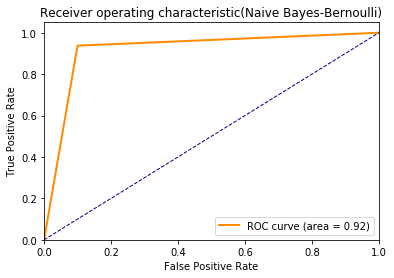

In [15]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(Naive Bayes-Bernoulli)')
plt.legend(loc="lower right")
plt.show()
